In [1036]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1037]:
import warnings
warnings.filterwarnings('ignore')

In [1038]:
matplotlib.rcParams.update({'font.size': 12})

In [1039]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(12,5))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    plt.show()

In [1040]:
TRAIN_DATASET_PATH = 'train.csv'
TEST_DATASET_PATH = 'test.csv'

In [1041]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df.tail()

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
9995   1260          61    2.0  49.090728   33.272626            6.0      3   
9996  16265          27    2.0  64.307684   37.038420            9.0     13   
9997   2795         178    1.0  29.648057   16.555363            5.0      3   
9998  14561          21    1.0  32.330292   22.326870            5.0      3   
9999   7202          94    1.0  35.815476   22.301367            6.0      9   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
9995        12.0       1981   0.300323         B         B        52   
9996         0.0       1977   0.072158         B         B         2   
9997         5.0       1958   0.460556         B         B        20   
9998         9.0       1969   0.194489         B         B        47   
9999         9.0       1975   0.127376         B         B        43   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
9995     10311         6           NaN            1        9       B   
9996       629         1           NaN            0        0       A   
9997      4386        14           NaN            1        5       B   
9998      8004         3         125.0            3        5       B   
9999      8429         3           NaN            3        9       B   

              Price  
9995  119367.455796  
9996  199715.148807  
9997  165953.912580  
9998  171842.411855  
9999  177685.627486

In [1042]:
train_df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [1043]:
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.tail()

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
4995  10379          29    2.0  43.177521   30.339945            5.0      6   
4996  16138          38    3.0  93.698122   94.521465           10.0     21   
4997   3912         101    1.0  33.656723   19.003259            5.0      2   
4998   5722          10    1.0  38.635155   20.976257            9.0      8   
4999  11004          21    2.0  67.122742   33.944344           13.0      9   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
4995         5.0       1962   0.069660         B         B        31   
4996        27.0       2018   0.060753         B         B        15   
4997         5.0       1966   0.038693         B         B        28   
4998        14.0       1970   0.089040         B         B        33   
4999        17.0       2009   0.194489         B         B        47   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  
4995      6119         4           NaN            1        2       B  
4996      2787         2         520.0            0        7       B  
4997      6533         1        1015.0            2        5       B  
4998      7976         5           NaN            0       11       B  
4999      8004         3         125.0            3        5       B

In [1044]:
print('Строк в трейне:', train_df.shape[0])
print('Строк в тесте', test_df.shape[0])

Строк в трейне: 10000
Строк в тесте 5000


In [1045]:
train_df.shape[1] - 1 == test_df.shape[1]

True

In [1046]:
train_df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [1047]:
train_df['Id'] = train_df['Id'].astype(str)
train_df['DistrictId'] = train_df['DistrictId'].astype(str)

# EDA

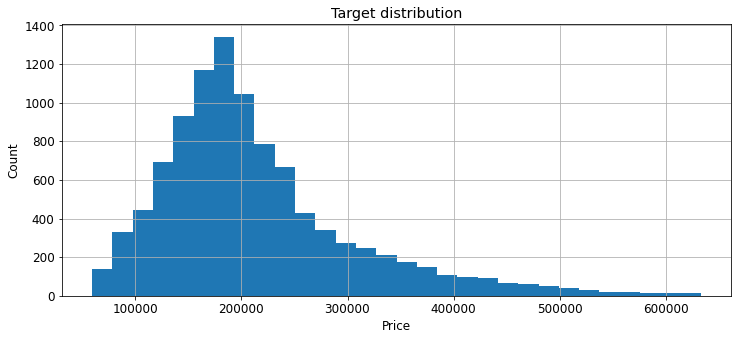

In [1048]:
plt.figure(figsize = (12, 5))

train_df['Price'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Price')

plt.title('Target distribution')
plt.show()

In [1049]:
train_df.describe()

Rooms        Square   LifeSquare  KitchenSquare         Floor  \
count  10000.000000  10000.000000  7887.000000   10000.000000  10000.000000   
mean       1.890500     56.315775    37.199645       6.273300      8.526700   
std        0.839512     21.058732    86.241209      28.560917      5.241148   
min        0.000000      1.136859     0.370619       0.000000      1.000000   
25%        1.000000     41.774881    22.769832       1.000000      4.000000   
50%        2.000000     52.513310    32.781260       6.000000      7.000000   
75%        2.000000     65.900625    45.128803       9.000000     12.000000   
max       19.000000    641.065193  7480.592129    2014.000000     42.000000   

         HouseFloor     HouseYear     Ecology_1      Social_1      Social_2  \
count  10000.000000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean      12.609400  3.990166e+03      0.118858     24.687000   5352.157400   
std        6.775974  2.005003e+05      0.119025     17.532614   4006.799803   
min        0.000000  1.910000e+03      0.000000      0.000000    168.000000   
25%        9.000000  1.974000e+03      0.017647      6.000000   1564.000000   
50%       13.000000  1.977000e+03      0.075424     25.000000   5285.000000   
75%       17.000000  2.001000e+03      0.195781     36.000000   7227.000000   
max      117.000000  2.005201e+07      0.521867     74.000000  19083.000000   

           Social_3  Healthcare_1   Helthcare_2       Shops_1          Price  
count  10000.000000   5202.000000  10000.000000  10000.000000   10000.000000  
mean       8.039200   1142.904460      1.319500      4.231300  214138.857399  
std       23.831875   1021.517264      1.493601      4.806341   92872.293865  
min        0.000000      0.000000      0.000000      0.000000   59174.778028  
25%        0.000000    350.000000      0.000000      1.000000  153872.633942  
50%        2.000000    900.000000      1.000000      3.000000  192269.644879  
75%        5.000000   1548.000000      2.000000      6.000000  249135.462171  
max      141.000000   4849.000000      6.000000     23.000000  633233.466570

In [1050]:
train_df.select_dtypes(include='object').columns.tolist()

['Id', 'DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [1051]:
train_df['DistrictId'].value_counts()

27     851
1      652
23     565
6      511
9      294
      ... 
117      1
207      1
199      1
205      1
196      1
Name: DistrictId, Length: 205, dtype: int64

In [1052]:
train_df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [1053]:
train_df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [1054]:
train_df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

## Обработка выбросов

### Rooms


In [1055]:
train_df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [1056]:
train_df['Rooms_outlier'] = 0
train_df.loc[(train_df['Rooms'] == 0) | (train_df['Rooms'] >= 6), 'Rooms_outlier'] = 1
train_df.head()

Id DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
0  11809         27    3.0  115.027311         NaN           10.0      4   
1   3013         22    1.0   39.832524   23.169223            8.0      7   
2   8215          1    3.0   78.342215   47.671972           10.0      2   
3   2352          1    1.0   40.409907         NaN            1.0     10   
4  13866         94    2.0   64.285067   38.562517            9.0     16   

   HouseFloor  HouseYear  Ecology_1  ... Ecology_3 Social_1  Social_2  \
0        10.0       2014   0.075424  ...         B       11      3097   
1         8.0       1966   0.118537  ...         B       30      6207   
2        17.0       1988   0.025609  ...         B       33      5261   
3        22.0       1977   0.007122  ...         B        1       264   
4        16.0       1972   0.282798  ...         B       33      8667   

   Social_3  Healthcare_1  Helthcare_2  Shops_1  Shops_2          Price  \
0         0           NaN            0        0        B  305018.871089   
1         1        1183.0            1        0        B  177734.553407   
2         0         240.0            3        1        B  282078.720850   
3         0           NaN            0        1        B  168106.007630   
4         2           NaN            0        6        B  343995.102962   

   Rooms_outlier  
0              0  
1              0  
2              0  
3              0  
4              0  

[5 rows x 21 columns]

In [1057]:
train_df.loc[train_df['Rooms'] == 0, 'Rooms'] = 1
train_df.loc[train_df['Rooms'] >= 6, 'Rooms'] = train_df['Rooms'].median()

In [1058]:
train_df['Rooms'].value_counts()

2.0    3884
1.0    3713
3.0    2235
4.0     150
5.0      18
Name: Rooms, dtype: int64

### Square

In [1059]:
train_df['Square'].describe()

count    10000.000000
mean        56.315775
std         21.058732
min          1.136859
25%         41.774881
50%         52.513310
75%         65.900625
max        641.065193
Name: Square, dtype: float64

In [1060]:
condition = (~train_df['LifeSquare'].isna()) \
             & (train_df['LifeSquare'] < train_df['Square'])
        
square_diff_median = train_df.loc[condition, 'Square'].sub(train_df.loc[condition, 'LifeSquare']).median()


In [1061]:
condition = (~train_df['LifeSquare'].isna()) \
             & (train_df['LifeSquare'] > train_df['Square'])

train_df.loc[condition, 'Square'] = train_df.loc[condition, 'LifeSquare'] + square_diff_median         

In [1062]:
train_df.loc[train_df['Square'] < 15]

Id DistrictId  Rooms    Square  LifeSquare  KitchenSquare  Floor  \
5009  11526         27    1.0  4.633498    1.969969            1.0     18   
9869   3224         27    1.0  2.377248    0.873147            0.0      1   

      HouseFloor  HouseYear  Ecology_1  ... Ecology_3 Social_1  Social_2  \
5009         1.0       1977   0.011654  ...         B        4       915   
9869         0.0       1977   0.017647  ...         B        2       469   

      Social_3  Healthcare_1  Helthcare_2  Shops_1  Shops_2          Price  \
5009         0           NaN            0        0        B  107604.269441   
9869         0           NaN            0        0        B  126596.941798   

      Rooms_outlier  
5009              0  
9869              1  

[2 rows x 21 columns]

In [1063]:
train_df.loc[train_df['Square'] < 15, 'Square'] = 15

In [1064]:
train_df['Square'].describe()

count    10000.000000
mean        58.144200
std         77.656572
min         15.000000
25%         42.127551
50%         53.826438
75%         66.783059
max       7499.646434
Name: Square, dtype: float64

### KitchenSquare

In [1065]:
train_df['KitchenSquare'].value_counts()

1.0       2460
8.0       1306
5.0       1169
10.0      1075
6.0       1038
9.0        843
0.0        697
7.0        609
12.0       249
11.0       233
13.0        67
14.0        51
4.0         39
15.0        31
3.0         22
16.0        16
20.0        14
17.0        12
19.0        11
18.0         6
2.0          4
22.0         3
43.0         2
112.0        2
41.0         2
32.0         2
58.0         2
25.0         2
37.0         2
30.0         2
51.0         2
40.0         1
96.0         1
48.0         1
72.0         1
73.0         1
2014.0       1
66.0         1
36.0         1
78.0         1
54.0         1
29.0         1
31.0         1
35.0         1
62.0         1
39.0         1
1970.0       1
60.0         1
75.0         1
26.0         1
21.0         1
84.0         1
63.0         1
123.0        1
53.0         1
42.0         1
23.0         1
27.0         1
Name: KitchenSquare, dtype: int64

In [1066]:
train_df['KitchenSquare'].quantile(.975), train_df['KitchenSquare'].quantile(.025)

(13.0, 0.0)

In [1067]:
condition = (train_df['KitchenSquare'].isna()) \
             | (train_df['KitchenSquare'] > train_df['KitchenSquare'].quantile(.975))
        
train_df.loc[condition, 'KitchenSquare'] = train_df['KitchenSquare'].median()

train_df.loc[train_df['KitchenSquare'] < 3, 'KitchenSquare'] = 3

In [1068]:
train_df['KitchenSquare'].value_counts()

3.0     3183
8.0     1306
6.0     1227
5.0     1169
10.0    1075
9.0      843
7.0      609
12.0     249
11.0     233
13.0      67
4.0       39
Name: KitchenSquare, dtype: int64

### HouseFloor, Floor

In [1069]:
train_df['HouseFloor'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        36.,  37.,  38.,  39.,  40.,  44.,  45.,  47.,  48.,  99., 117.])

In [1070]:
train_df['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 37, 42],
      dtype=int64)

In [1071]:
(train_df['Floor'] > train_df['HouseFloor']).sum()

1825

In [1072]:
train_df['HouseFloor_outlier'] = 0
train_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1
train_df.loc[train_df['Floor'] > train_df['HouseFloor'], 'HouseFloor_outlier'] = 1

In [1073]:
train_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor'] = train_df['HouseFloor'].median()

In [1074]:
floor_outliers = train_df.loc[train_df['Floor'] > train_df['HouseFloor']].index
floor_outliers

Int64Index([  17,   19,   21,   25,   26,   33,   34,   37,   39,   44,
            ...
            9913, 9921, 9930, 9931, 9938, 9953, 9960, 9968, 9970, 9975],
           dtype='int64', length=1610)

In [1075]:
train_df.loc[floor_outliers, 'Floor'] = train_df.loc[floor_outliers, 'HouseFloor']\
                                                .apply(lambda x: random.randint(1, x))

In [1076]:
(train_df['Floor'] > train_df['HouseFloor']).sum()

0

### HouseYear

In [1077]:
train_df['HouseYear'].sort_values(ascending=False)

9163    20052011
8828        4968
7246        2020
2350        2020
8296        2020
          ...   
7610        1916
6250        1914
2066        1912
2795        1912
6794        1910
Name: HouseYear, Length: 10000, dtype: int64

In [1078]:
train_df.loc[train_df['HouseYear'] > 2020, 'HouseYear'] = 2020

## Обработка пропусков

In [1079]:
train_df.isna().sum()

Id                       0
DistrictId               0
Rooms                    0
Square                   0
LifeSquare            2113
KitchenSquare            0
Floor                    0
HouseFloor               0
HouseYear                0
Ecology_1                0
Ecology_2                0
Ecology_3                0
Social_1                 0
Social_2                 0
Social_3                 0
Healthcare_1          4798
Helthcare_2              0
Shops_1                  0
Shops_2                  0
Price                    0
Rooms_outlier            0
HouseFloor_outlier       0
dtype: int64

In [1080]:
train_df[['Square', 'LifeSquare', 'KitchenSquare']].head(10)

Square  LifeSquare  KitchenSquare
0  115.027311         NaN           10.0
1   39.832524   23.169223            8.0
2   78.342215   47.671972           10.0
3   40.409907         NaN            3.0
4   64.285067   38.562517            9.0
5   62.528465   47.103833            6.0
6   33.938750   21.772930            9.0
7   50.391814   32.893256            8.0
8   46.887892   44.628132            3.0
9   79.867477   75.085125            3.0

### LifeSquare

In [1081]:
train_df['LifeSquare_nan'] = train_df['LifeSquare'].isna() * 1

condition = (train_df['LifeSquare'].isna()) \
             & (~train_df['Square'].isna()) \
             & (~train_df['KitchenSquare'].isna())
        
train_df.loc[condition, 'LifeSquare'] = train_df.loc[condition, 'Square'] \
                                            - train_df.loc[condition, 'KitchenSquare'] - 3

### Healthcare_1

In [1082]:
train_df.drop('Healthcare_1', axis=1, inplace=True)

In [1083]:
class DataPreprocessing:
    """Подготовка исходных данных"""

    def __init__(self):
        """Параметры класса"""
        self.medians=None
        self.kitchen_square_quantile = None
        
    def fit(self, X):
        """Сохранение статистик"""       
        # Расчет медиан
        self.medians = X.median()
        self.kitchen_square_quantile = X['KitchenSquare'].quantile(.975)
        condition = (~X['LifeSquare'].isna()) & (X['LifeSquare'] < X['Square'])
        self.square_diff_median = X.loc[condition, \
             'Square'].sub(X.loc[condition, 'LifeSquare']).median()

        
    
    def transform(self, X):
        """Трансформация данных"""

        # Rooms
        X['Rooms_outlier'] = 0
        X.loc[(X['Rooms'] == 0) | (X['Rooms'] >= 6), 'Rooms_outlier'] = 1
        
        X.loc[X['Rooms'] == 0, 'Rooms'] = 1
        X.loc[X['Rooms'] >= 6, 'Rooms'] = self.medians['Rooms']

        # Square
        condition = (~X['LifeSquare'].isna()) \
             & (X['LifeSquare'] > X['Square'])

        X.loc[condition, 'Square'] = X.loc[condition, 'LifeSquare'] + self.square_diff_median
        X.loc[X['Square'] < 15, 'Square'] = 15
        
        # KitchenSquare
        condition = (X['KitchenSquare'].isna()) \
                    | (X['KitchenSquare'] > self.kitchen_square_quantile)
        
        X.loc[condition, 'KitchenSquare'] = self.medians['KitchenSquare']

        X.loc[X['KitchenSquare'] < 3, 'KitchenSquare'] = 3
        
        # HouseFloor, Floor
        X['HouseFloor_outlier'] = 0
        X.loc[X['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1
        X.loc[X['Floor'] > X['HouseFloor'], 'HouseFloor_outlier'] = 1
        
        X.loc[X['HouseFloor'] == 0, 'HouseFloor'] = self.medians['HouseFloor']
        
        floor_outliers = X.loc[X['Floor'] > X['HouseFloor']].index
        X.loc[floor_outliers, 'Floor'] = X.loc[floor_outliers, 'HouseFloor']\
                                            .apply(lambda x: random.randint(1, x))
        
        # HouseYear
        current_year = datetime.now().year
        
        X['HouseYear_outlier'] = 0
        X.loc[X['HouseYear'] > current_year, 'HouseYear_outlier'] = 1
        
        X.loc[X['HouseYear'] > current_year, 'HouseYear'] = current_year
        
        # Healthcare_1
        if 'Healthcare_1' in X.columns:
            X.drop('Healthcare_1', axis=1, inplace=True)
            
        # LifeSquare
        X['LifeSquare_nan'] = X['LifeSquare'].isna() * 1
        condition = (X['LifeSquare'].isna()) & \
                      (~X['Square'].isna()) & \
                      (~X['KitchenSquare'].isna())
        
        X.loc[condition, 'LifeSquare'] = X.loc[condition, 'Square'] - X.loc[condition, 'KitchenSquare'] - 3
        
        
        X.fillna(self.medians, inplace=True)
        
        return X

## Построение новых признаков

### Dummies

In [1084]:
binary_to_numbers = {'A': 0, 'B': 1}

train_df['Ecology_2'] = train_df['Ecology_2'].replace(binary_to_numbers)
train_df['Ecology_3'] = train_df['Ecology_3'].replace(binary_to_numbers)
train_df['Shops_2'] = train_df['Shops_2'].replace(binary_to_numbers)

### DistrictSize, IsDistrictLarge

In [1085]:
district_size = train_df['DistrictId'].value_counts().reset_index()\
                    .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})

district_size.head()

DistrictId  DistrictSize
0         27           851
1          1           652
2         23           565
3          6           511
4          9           294

In [1086]:
train_df = train_df.merge(district_size, on='DistrictId', how='left')
train_df.head()

Id DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
0  11809         27    3.0  115.027311  102.027311           10.0      4   
1   3013         22    1.0   39.832524   23.169223            8.0      7   
2   8215          1    3.0   78.342215   47.671972           10.0      2   
3   2352          1    1.0   40.409907   34.409907            3.0     10   
4  13866         94    2.0   64.285067   38.562517            9.0     16   

   HouseFloor  HouseYear  Ecology_1  ...  Social_2  Social_3  Helthcare_2  \
0        10.0       2014   0.075424  ...      3097         0            0   
1         8.0       1966   0.118537  ...      6207         1            1   
2        17.0       1988   0.025609  ...      5261         0            3   
3        22.0       1977   0.007122  ...       264         0            0   
4        16.0       1972   0.282798  ...      8667         2            0   

   Shops_1  Shops_2          Price  Rooms_outlier  HouseFloor_outlier  \
0        0        1  305018.871089              0                   0   
1        0        1  177734.553407              0                   0   
2        1        1  282078.720850              0                   0   
3        1        1  168106.007630              0                   0   
4        6        1  343995.102962              0                   0   

   LifeSquare_nan  DistrictSize  
0               1           851  
1               0            78  
2               0           652  
3               1           652  
4               0            89  

[5 rows x 23 columns]

In [1087]:
(train_df['DistrictSize'] > 100).value_counts()

True     5069
False    4931
Name: DistrictSize, dtype: int64

In [1088]:
train_df['IsDistrictLarge'] = (train_df['DistrictSize'] > 100).astype(int)

### MedPriceByDistrict

In [1089]:
med_price_by_district = train_df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                            .rename(columns={'Price':'MedPriceByDistrict'})

med_price_by_district.head()

DistrictId  Rooms  MedPriceByDistrict
0          0    1.0       142799.434052
1          0    2.0       176210.812334
2          0    3.0       300610.359425
3          1    1.0       146735.671740
4          1    2.0       202666.310126

In [1090]:
train_df = train_df.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
train_df.head()

Id DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
0  11809         27    3.0  115.027311  102.027311           10.0      4   
1   3013         22    1.0   39.832524   23.169223            8.0      7   
2   8215          1    3.0   78.342215   47.671972           10.0      2   
3   2352          1    1.0   40.409907   34.409907            3.0     10   
4  13866         94    2.0   64.285067   38.562517            9.0     16   

   HouseFloor  HouseYear  Ecology_1  ...  Helthcare_2  Shops_1  Shops_2  \
0        10.0       2014   0.075424  ...            0        0        1   
1         8.0       1966   0.118537  ...            1        0        1   
2        17.0       1988   0.025609  ...            3        1        1   
3        22.0       1977   0.007122  ...            0        1        1   
4        16.0       1972   0.282798  ...            0        6        1   

           Price  Rooms_outlier  HouseFloor_outlier  LifeSquare_nan  \
0  305018.871089              0                   0               1   
1  177734.553407              0                   0               0   
2  282078.720850              0                   0               0   
3  168106.007630              0                   0               1   
4  343995.102962              0                   0               0   

   DistrictSize  IsDistrictLarge  MedPriceByDistrict  
0           851                1       213530.788443  
1            78                0       146032.829834  
2           652                1       244005.272380  
3           652                1       146735.671740  
4            89                0       201584.441255  

[5 rows x 25 columns]

### MedPriceByFloorYear

In [1091]:
def floor_to_cat_pandas(X):
    bins = [0, 3, 5, 9, 15, X['Floor'].max()]
    X['floor_cat'] = pd.cut(X['Floor'], bins=bins, labels=False)
    
    X['floor_cat'].fillna(-1, inplace=True)
    return X

def year_to_cat_pandas(X):
    bins = [0, 1941, 1945, 1980, 2000, 2010, X['HouseYear'].max()]
    X['year_cat'] = pd.cut(X['HouseYear'], bins=bins, labels=False)
    
    X['year_cat'].fillna(-1, inplace=True)
    return X

In [1092]:
bins = [0, 3, 5, 9, 15, train_df['Floor'].max()]
pd.cut(train_df['Floor'], bins=bins, labels=False)

0       1
1       2
2       0
3       3
4       4
       ..
9995    0
9996    3
9997    0
9998    0
9999    2
Name: Floor, Length: 10000, dtype: int64

In [1093]:
bins = [0, 3, 5, 9, 15, train_df['Floor'].max()]
pd.cut(train_df['Floor'], bins=bins)

0         (3, 5]
1         (5, 9]
2         (0, 3]
3        (9, 15]
4       (15, 42]
          ...   
9995      (0, 3]
9996     (9, 15]
9997      (0, 3]
9998      (0, 3]
9999      (5, 9]
Name: Floor, Length: 10000, dtype: category
Categories (5, interval[int64]): [(0, 3] < (3, 5] < (5, 9] < (9, 15] < (15, 42]]

In [1094]:
train_df = year_to_cat_pandas(train_df)
train_df = floor_to_cat_pandas(train_df)
train_df.head()

Id DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
0  11809         27    3.0  115.027311  102.027311           10.0      4   
1   3013         22    1.0   39.832524   23.169223            8.0      7   
2   8215          1    3.0   78.342215   47.671972           10.0      2   
3   2352          1    1.0   40.409907   34.409907            3.0     10   
4  13866         94    2.0   64.285067   38.562517            9.0     16   

   HouseFloor  HouseYear  Ecology_1  ...  Shops_2          Price  \
0        10.0       2014   0.075424  ...        1  305018.871089   
1         8.0       1966   0.118537  ...        1  177734.553407   
2        17.0       1988   0.025609  ...        1  282078.720850   
3        22.0       1977   0.007122  ...        1  168106.007630   
4        16.0       1972   0.282798  ...        1  343995.102962   

   Rooms_outlier  HouseFloor_outlier  LifeSquare_nan  DistrictSize  \
0              0                   0               1           851   
1              0                   0               0            78   
2              0                   0               0           652   
3              0                   0               1           652   
4              0                   0               0            89   

   IsDistrictLarge  MedPriceByDistrict  year_cat  floor_cat  
0                1       213530.788443         5          1  
1                0       146032.829834         2          2  
2                1       244005.272380         3          0  
3                1       146735.671740         2          3  
4                0       201584.441255         2          4  

[5 rows x 27 columns]

In [1095]:
med_price_by_floor_year = train_df.groupby(['year_cat', 'floor_cat'], as_index=False).agg({'Price':'median'}).\
                                            rename(columns={'Price':'MedPriceByFloorYear'})
med_price_by_floor_year.head()

year_cat  floor_cat  MedPriceByFloorYear
0         0          0        379841.447890
1         0          1        321506.277104
2         0          2        429458.388683
3         0          3        274992.472366
4         1          0        467230.539057

In [1096]:
train_df = train_df.merge(med_price_by_floor_year, on=['year_cat', 'floor_cat'], how='left')
train_df.head()

Id DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
0  11809         27    3.0  115.027311  102.027311           10.0      4   
1   3013         22    1.0   39.832524   23.169223            8.0      7   
2   8215          1    3.0   78.342215   47.671972           10.0      2   
3   2352          1    1.0   40.409907   34.409907            3.0     10   
4  13866         94    2.0   64.285067   38.562517            9.0     16   

   HouseFloor  HouseYear  Ecology_1  ...          Price  Rooms_outlier  \
0        10.0       2014   0.075424  ...  305018.871089              0   
1         8.0       1966   0.118537  ...  177734.553407              0   
2        17.0       1988   0.025609  ...  282078.720850              0   
3        22.0       1977   0.007122  ...  168106.007630              0   
4        16.0       1972   0.282798  ...  343995.102962              0   

   HouseFloor_outlier  LifeSquare_nan  DistrictSize  IsDistrictLarge  \
0                   0               1           851                1   
1                   0               0            78                0   
2                   0               0           652                1   
3                   0               1           652                1   
4                   0               0            89                0   

   MedPriceByDistrict  year_cat  floor_cat  MedPriceByFloorYear  
0       213530.788443         5          1        163047.087076  
1       146032.829834         2          2        192761.992851  
2       244005.272380         3          0        205210.068542  
3       146735.671740         2          3        183575.193416  
4       201584.441255         2          4        173028.982008  

[5 rows x 28 columns]

### avg_price_per_sqrm_on_dist

In [1097]:
train_df['price_per_sqrm'] = train_df.Price / train_df.Square

In [1098]:
avg_price_per_sqrm_on_dist = train_df.groupby('DistrictId', as_index=False).agg({'price_per_sqrm': 'mean'}).rename(columns={'price_per_sqrm':'avg_price_per_sqrm_on_dist'})

In [1099]:
train_df = train_df.merge(avg_price_per_sqrm_on_dist, on='DistrictId', how='left')
train_df.head()

Id DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
0  11809         27    3.0  115.027311  102.027311           10.0      4   
1   3013         22    1.0   39.832524   23.169223            8.0      7   
2   8215          1    3.0   78.342215   47.671972           10.0      2   
3   2352          1    1.0   40.409907   34.409907            3.0     10   
4  13866         94    2.0   64.285067   38.562517            9.0     16   

   HouseFloor  HouseYear  Ecology_1  ...  HouseFloor_outlier  LifeSquare_nan  \
0        10.0       2014   0.075424  ...                   0               1   
1         8.0       1966   0.118537  ...                   0               0   
2        17.0       1988   0.025609  ...                   0               0   
3        22.0       1977   0.007122  ...                   0               1   
4        16.0       1972   0.282798  ...                   0               0   

   DistrictSize  IsDistrictLarge  MedPriceByDistrict  year_cat  floor_cat  \
0           851                1       213530.788443         5          1   
1            78                0       146032.829834         2          2   
2           652                1       244005.272380         3          0   
3           652                1       146735.671740         2          3   
4            89                0       201584.441255         2          4   

   MedPriceByFloorYear  price_per_sqrm  avg_price_per_sqrm_on_dist  
0        163047.087076     2651.708272                 2699.388817  
1        192761.992851     4462.045990                 3738.867404  
2        205210.068542     3600.596698                 3118.599158  
3        183575.193416     4160.019670                 3118.599158  
4        173028.982008     5351.088794                 4194.536925  

[5 rows x 30 columns]

### avg_hy_per_dist

In [1100]:
avg_hy_per_dist = train_df.groupby('DistrictId', as_index=False).agg({'HouseYear': 'mean'}).rename(columns={'HouseYear':'avg_hy_per_dist'})

In [1101]:
train_df = train_df.merge(avg_hy_per_dist, on='DistrictId', how='left')
train_df.head()

Id DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
0  11809         27    3.0  115.027311  102.027311           10.0      4   
1   3013         22    1.0   39.832524   23.169223            8.0      7   
2   8215          1    3.0   78.342215   47.671972           10.0      2   
3   2352          1    1.0   40.409907   34.409907            3.0     10   
4  13866         94    2.0   64.285067   38.562517            9.0     16   

   HouseFloor  HouseYear  Ecology_1  ...  LifeSquare_nan  DistrictSize  \
0        10.0       2014   0.075424  ...               1           851   
1         8.0       1966   0.118537  ...               0            78   
2        17.0       1988   0.025609  ...               0           652   
3        22.0       1977   0.007122  ...               1           652   
4        16.0       1972   0.282798  ...               0            89   

   IsDistrictLarge  MedPriceByDistrict  year_cat  floor_cat  \
0                1       213530.788443         5          1   
1                0       146032.829834         2          2   
2                1       244005.272380         3          0   
3                1       146735.671740         2          3   
4                0       201584.441255         2          4   

   MedPriceByFloorYear  price_per_sqrm  avg_price_per_sqrm_on_dist  \
0        163047.087076     2651.708272                 2699.388817   
1        192761.992851     4462.045990                 3738.867404   
2        205210.068542     3600.596698                 3118.599158   
3        183575.193416     4160.019670                 3118.599158   
4        173028.982008     5351.088794                 4194.536925   

   avg_hy_per_dist  
0      1994.113984  
1      1976.923077  
2      1985.361963  
3      1985.361963  
4      1980.651685  

[5 rows x 31 columns]

In [1102]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id                          10000 non-null  object 
 1   DistrictId                  10000 non-null  object 
 2   Rooms                       10000 non-null  float64
 3   Square                      10000 non-null  float64
 4   LifeSquare                  10000 non-null  float64
 5   KitchenSquare               10000 non-null  float64
 6   Floor                       10000 non-null  int64  
 7   HouseFloor                  10000 non-null  float64
 8   HouseYear                   10000 non-null  int64  
 9   Ecology_1                   10000 non-null  float64
 10  Ecology_2                   10000 non-null  int64  
 11  Ecology_3                   10000 non-null  int64  
 12  Social_1                    10000 non-null  int64  
 13  Social_2                    1000

In [1103]:
class FeatureGenetator():
    """Генерация новых фич"""
    
    def __init__(self):
        self.DistrictId_counts = None
        self.binary_to_numbers = None
        #self.med_price_by_district = None
        #self.med_price_by_floor_year = None
        self.house_year_max = None
        self.floor_max = None
        self.district_size = None
        self.avg_price_per_sqrm_on_dist = None
        self.avg_hy_per_dist = None
        
    def fit(self, X, y=None):
        
        X = X.copy()
        
        # Binary features
        self.binary_to_numbers = {'A': 0, 'B': 1}
        
        # DistrictID
        self.district_size = X['DistrictId'].value_counts().reset_index() \
                               .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})
        
        # Avg house age in district
        self.avg_hy_per_dist = X.groupby('DistrictId', as_index=False).agg({'HouseYear': 'mean'}) \
            .rename(columns={'HouseYear':'avg_hy_per_dist'})
        self.avg_hy_per_dist_median = self.avg_hy_per_dist['avg_hy_per_dist'].median()
                
        # Target encoding
        ## District, Rooms
        df = X.copy()
        
        # if y is not None:
        #     df['Price'] = y.values
            
        #     self.med_price_by_district = df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
        #                                     .rename(columns={'Price':'MedPriceByDistrict'})
            
        #     self.med_price_by_district_median = self.med_price_by_district['MedPriceByDistrict'].median()
            
        ## floor, year
        if y is not None:
            self.floor_max = df['Floor'].max()
            self.house_year_max = df['HouseYear'].max()
            df['Price'] = y.values
            df = self.floor_to_cat(df)
            df = self.year_to_cat(df)
        #     self.med_price_by_floor_year = df.groupby(['year_cat', 'floor_cat'], as_index=False).agg({'Price':'median'}).\
        #                                     rename(columns={'Price':'MedPriceByFloorYear'})
        #     self.med_price_by_floor_year_median = self.med_price_by_floor_year['MedPriceByFloorYear'].median()

        ## Avg price per squared m in district 
        if y is not None:
            df['Price'] = y.values
            df['price_per_sqrm'] = df.Price / df.Square
            self.avg_price_per_sqrm_on_dist = df.groupby('DistrictId', as_index=False).agg({'price_per_sqrm': 'mean'}) \
                .rename(columns={'price_per_sqrm':'avg_price_per_sqrm_on_dist'})
            self.avg_price_per_sqrm_on_dist_median = self.avg_price_per_sqrm_on_dist['avg_price_per_sqrm_on_dist'].median()
        

        
    def transform(self, X):
        
        # Binary features
        X['Ecology_2'] = X['Ecology_2'].map(self.binary_to_numbers)  # self.binary_to_numbers = {'A': 0, 'B': 1}
        X['Ecology_3'] = X['Ecology_3'].map(self.binary_to_numbers)
        X['Shops_2'] = X['Shops_2'].map(self.binary_to_numbers)
        
        # DistrictId, IsDistrictLarge
        X = X.merge(self.district_size, on='DistrictId', how='left')
        
        X['new_district'] = 0
        X.loc[X['DistrictSize'].isna(), 'new_district'] = 1
        
        X['DistrictSize'].fillna(5, inplace=True)
        
        X['IsDistrictLarge'] = (X['DistrictSize'] > 100).astype(int)
        
        # More categorical features
        X = self.floor_to_cat(X)  # + столбец floor_cat
        X = self.year_to_cat(X)   # + столбец year_cat

        if self.avg_hy_per_dist is not None:
            X = X.merge(self.avg_hy_per_dist, on='DistrictId', how='left')
            X.fillna(self.avg_hy_per_dist_median, inplace=True)
        
        # Target encoding
        # if self.med_price_by_district is not None:
        #     X = X.merge(self.med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
        #     X.fillna(self.med_price_by_district_median, inplace=True)
            
        # if self.med_price_by_floor_year is not None:
        #     X = X.merge(self.med_price_by_floor_year, on=['year_cat', 'floor_cat'], how='left')
        #     X.fillna(self.med_price_by_floor_year_median, inplace=True)

        if self.avg_price_per_sqrm_on_dist is not None:
            X = X.merge(self.avg_price_per_sqrm_on_dist, on='DistrictId', how='left')
            X.fillna(self.avg_price_per_sqrm_on_dist_median, inplace=True)
        
        X  = X.drop(labels=['Id','DistrictId'], axis=1)
        
        return X
    
    def floor_to_cat(self, X):
        bins = [0, 3, 5, 9, 15, self.floor_max]
        X['floor_cat'] = pd.cut(X['Floor'], bins=bins, labels=False)

        X['floor_cat'].fillna(-1, inplace=True) 
        return X
     
    def year_to_cat(self, X):
        bins = [0, 1941, 1945, 1980, 2000, 2010, self.house_year_max]
        X['year_cat'] = pd.cut(X['HouseYear'], bins=bins, labels=False)

        X['year_cat'].fillna(-1, inplace=True)
        return X
            

In [1104]:
train_df.to_pickle('prepared.pkl')

In [1105]:
train_df = train_df.drop('price_per_sqrm', axis=1)

## Отбор признаков

In [1106]:
train_df.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'Rooms_outlier',
 'HouseFloor_outlier',
 'LifeSquare_nan',
 'DistrictSize',
 'IsDistrictLarge',
 'MedPriceByDistrict',
 'year_cat',
 'floor_cat',
 'MedPriceByFloorYear',
 'avg_price_per_sqrm_on_dist',
 'avg_hy_per_dist']

In [1107]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3',
                 'Helthcare_2', 'Shops_1', 'Shops_2']

new_feature_names = ['Rooms_outlier', 'HouseFloor_outlier', 'HouseYear_outlier', 'LifeSquare_nan', 'DistrictSize',
                     'new_district', 'IsDistrictLarge', 'avg_price_per_sqrm_on_dist', 'avg_hy_per_dist']

target_name = 'Price'

In [1108]:
#  'MedPriceByDistrict', 'MedPriceByFloorYear'

## Разбиние на train, valid и test

In [1109]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
test_df = pd.read_csv(TEST_DATASET_PATH)

X = train_df.drop(columns=target_name)
y = train_df[target_name]

In [1110]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [1111]:
preprocessor = DataPreprocessing()
preprocessor.fit(X_train)

X_train = preprocessor.transform(X_train)
X_valid = preprocessor.transform(X_valid)
test_df = preprocessor.transform(test_df)

X_train.shape, X_valid.shape, test_df.shape

((7000, 22), (3000, 22), (5000, 22))

In [1112]:
features_gen = FeatureGenetator()
features_gen.fit(X_train, y_train)

X_train = features_gen.transform(X_train)
X_valid = features_gen.transform(X_valid)
test_df = features_gen.transform(test_df)

X_train.shape, X_valid.shape, test_df.shape

((7000, 27), (3000, 27), (5000, 27))

In [1113]:
X_train = X_train[feature_names + new_feature_names]
X_valid = X_valid[feature_names + new_feature_names]
test_df = test_df[feature_names + new_feature_names]

In [1114]:
X_train.isna().sum().sum(), X_valid.isna().sum().sum(), test_df.isna().sum().sum()

(0, 0, 0)

## Построение модели

### Обучение

In [1115]:
rf_model = RandomForestRegressor(random_state=42, criterion='mse')
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Оценка модели

Train R2:	0.965
Test R2:	0.713


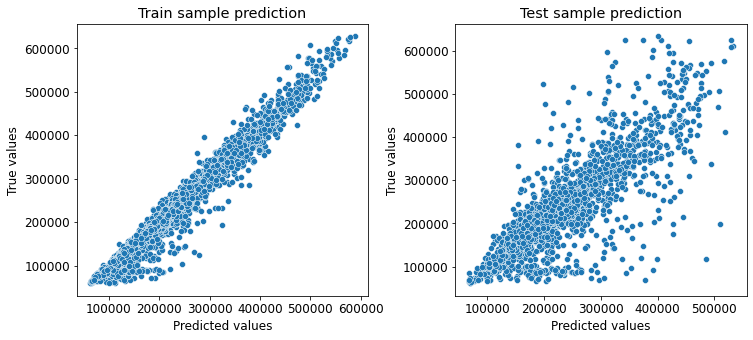

In [1116]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

### Кросс-валидация

In [1117]:
cv_score = cross_val_score(rf_model, X_train, y_train, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=42))
cv_score

array([0.74858308, 0.74391843, 0.71282703])

In [1118]:
cv_score.mean()

0.735109514495328

### Важность признаков

In [1119]:
feature_importances = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

feature_name    importance
23  avg_price_per_sqrm_on_dist  3.155760e-01
1                       Square  2.935076e-01
0                        Rooms  1.576299e-01
2                   LifeSquare  3.815457e-02
6                    HouseYear  2.863958e-02
3                KitchenSquare  2.146366e-02
11                    Social_2  1.968781e-02
5                   HouseFloor  1.909543e-02
4                        Floor  1.794273e-02
10                    Social_1  1.639265e-02
24             avg_hy_per_dist  1.404429e-02
7                    Ecology_1  1.402658e-02
20                DistrictSize  1.307329e-02
12                    Social_3  1.061414e-02
14                     Shops_1  8.650610e-03
13                 Helthcare_2  5.244711e-03
17          HouseFloor_outlier  2.411912e-03
19              LifeSquare_nan  1.437229e-03
15                     Shops_2  9.425307e-04
9                    Ecology_3  9.305504e-04
22             IsDistrictLarge  3.623094e-04
8                    Ecology_2  1.605171e-04
16               Rooms_outlier  1.129001e-05
18           HouseYear_outlier  2.015183e-07
21                new_district  0.000000e+00

### Усложнение модели

In [1120]:
from sklearn.ensemble import StackingRegressor, VotingRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import  KNeighborsRegressor

rf_model = RandomForestRegressor(random_state=21, criterion='mse')
lr = LinearRegression()
gb = GradientBoostingRegressor()
knn = KNeighborsRegressor(n_neighbors=10)
c = BaggingRegressor(knn, base_estimator=100)

vote = VotingRegressor([('c', c), ('rf', rf_model)])
vote.fit(X_train, y_train)

VotingRegressor(estimators=[('c',
                             BaggingRegressor(base_estimator=KNeighborsRegressor(n_neighbors=10))),
                            ('rf', RandomForestRegressor(random_state=21))])

Train R2:	0.868
Test R2:	0.685


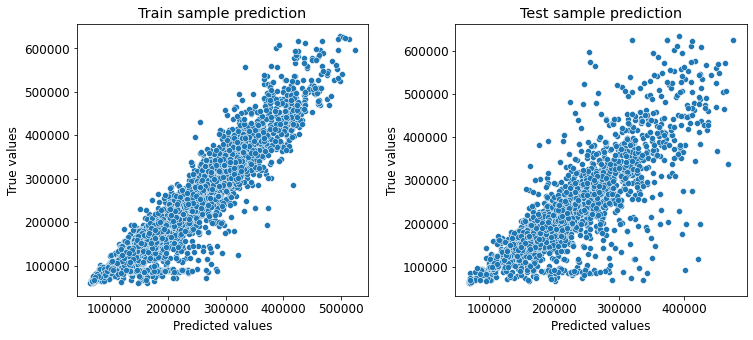

In [1121]:
y_train_preds = vote.predict(X_train)
y_valid_preds = vote.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_valid_preds)

In [1122]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_valid_scaled = pd.DataFrame(scaler.transform(X_valid), columns=X_valid.columns)

In [1123]:
stack = StackingRegressor([('lr', lr), ('rf', rf_model)], final_estimator=gb)
stack.fit(X_train, y_train)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('rf', RandomForestRegressor(random_state=21))],
                  final_estimator=GradientBoostingRegressor())

Train R2:	0.918
Test R2:	0.7


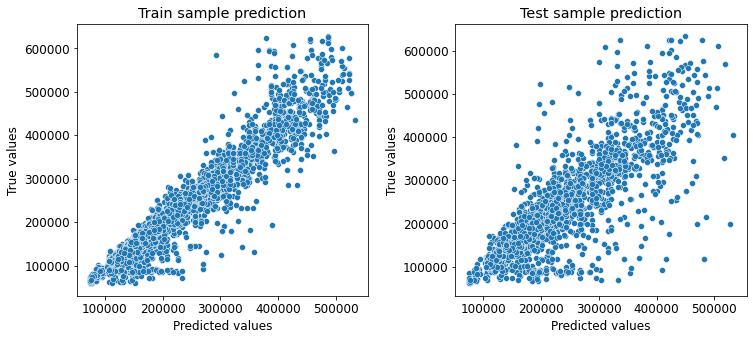

In [1124]:
y_train_preds = stack.predict(X_train)
y_valid_preds = stack.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_valid_preds)

In [1125]:
# %%time
# params = {'n_estimators':[50, 100, 200, 400], 
#           'max_depth':[3, 5, 7, 10, 15]}

# gs = GridSearchCV(gb_model, params, 
#                   scoring='r2', # метрика 
#                   cv=KFold(n_splits=5,   # k (кол-во разбиений/итераций) в кросс-валидации
#                            random_state=21, 
#                            shuffle=True),
#                   n_jobs=-1
#                   )
# gs.fit(X_train, y_train)

In [1126]:
# gs.best_params_

In [1127]:
# gs.best_score_

In [1128]:
gb_model = GradientBoostingRegressor(criterion='mse',
                                        max_depth=5,
                                        min_samples_leaf=10,
                                        random_state=42,
                                        n_estimators=100)

gb_model.fit(X_train, y_train)

GradientBoostingRegressor(criterion='mse', max_depth=5, min_samples_leaf=10,
                          random_state=42)

Train R2:	0.854
Test R2:	0.731


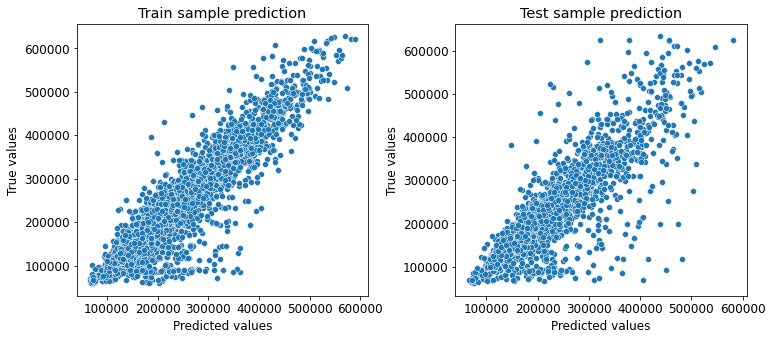

In [1129]:
y_train_preds = gb_model.predict(X_train)
y_valid_preds = gb_model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_valid_preds)

## Прогнозировние на тестовом датасете

In [1030]:
test_df.shape

(5000, 25)

In [1031]:
test_df

Rooms      Square  LifeSquare  KitchenSquare  Floor  HouseFloor  \
0       1.0   36.847630   19.094182            5.0      5         9.0   
1       1.0   61.454441   42.568133           10.0      7        17.0   
2       2.0   59.463678   47.463678            9.0     19        19.0   
3       3.0   49.646030   33.893825            6.0      2         2.0   
4       1.0   53.837056   47.837056            3.0      8        17.0   
...     ...         ...         ...            ...    ...         ...   
4995    2.0   43.177521   30.339945            5.0      3         5.0   
4996    3.0  113.407773   94.521465           10.0     21        27.0   
4997    1.0   33.656723   19.003259            5.0      2         5.0   
4998    1.0   38.635155   20.976257            9.0      8        14.0   
4999    2.0   67.122742   33.944344            6.0      9        17.0   

      HouseYear  Ecology_1  Ecology_2  Ecology_3  ...  Shops_2  Rooms_outlier  \
0          1970   0.036122          1          1  ...        1              0   
1          2017   0.072158          1          1  ...        0              0   
2          1977   0.211401          1          1  ...        1              0   
3          1965   0.014073          1          1  ...        1              0   
4          1977   0.309479          1          1  ...        1              0   
...         ...        ...        ...        ...  ...      ...            ...   
4995       1962   0.069660          1          1  ...        1              0   
4996       2018   0.060753          1          1  ...        1              0   
4997       1966   0.038693          1          1  ...        1              0   
4998       1970   0.089040          1          1  ...        1              0   
4999       2009   0.194489          1          1  ...        1              0   

      HouseFloor_outlier  HouseYear_outlier  LifeSquare_nan  DistrictSize  \
0                      0                  0               0          73.0   
1                      0                  0               0         173.0   
2                      0                  0               1         594.0   
3                      0                  0               0         390.0   
4                      0                  0               1          79.0   
...                  ...                ...             ...           ...   
4995                   1                  0               0          62.0   
4996                   0                  0               0          25.0   
4997                   0                  0               0          71.0   
4998                   0                  0               0          36.0   
4999                   0                  0               0         124.0   

      new_district  IsDistrictLarge  avg_price_per_sqrm_on_dist  \
0                0                0                 4580.690165   
1                0                1                 2716.833692   
2                0                1                 2685.836584   
3                0                1                 2218.374400   
4                0                0                 3289.832300   
...            ...              ...                         ...   
4995             0                0                 4077.066534   
4996             0                0                 5149.611350   
4997             0                0                 4161.313115   
4998             0                0                 4465.436235   
4999             0                1                 4043.804710   

      avg_hy_per_dist  
0         1978.698630  
1         1991.104046  
2         1993.712121  
3         1988.248718  
4         1992.670886  
...               ...  
4995      1972.370968  
4996      1999.400000  
4997      1970.338028  
4998      1977.972222  
4999      1974.790323  

[5000 rows x 25 columns]

In [1032]:
predictions = gb_model.predict(test_df)
predictions

array([177044.48644655, 125160.24814508, 137558.61586316, ...,
       151382.52437753, 190227.43570599, 278943.12152904])

In [1033]:
submit = pd.read_csv('sample_submission.csv')
submit.head()

Id     Price
0  4567  200000.0
1  5925  200000.0
2   960  200000.0
3  3848  200000.0
4   746  200000.0

In [1034]:
submit['Price'] = predictions
submit.head()

Id          Price
0  4567  177044.486447
1  5925  125160.248145
2   960  137558.615863
3  3848  114377.201458
4   746  159568.983375

In [1035]:
submit.to_csv('rf_submit.csv', index=False)